<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Игорь! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты и сразу увидеть исправленное. <br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Олег, привет! На "ты" - нормально)</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Привет! Хорошо, пошел смотреть, что мы наработали. 😄</font>

<h2>Описание проекта <a class="tocSkip"> </h2>

**Заказчик** - интернет-магазине «Стримчик».
    
**Цель проекта** - выявить определяющие успешность игры факторы и спланировать компанию продаж на 2017-й год.
    
**Входные данные»** - данные о выпущенных играх в период с начала выпуска первой игры до 2016 года. Ниже описаны обозначения столбцов:
- `Name` — название игры;
- `Platform` — Platform;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работ:**
- *Изучение общей информации о данных*
 
    
- *Предобработка данных*
    - удаление пропусков
    - обработка аномальных значений
    - изменение типов данных
    - обработка дубликатов
    - категоризация данных
    
    
- *Исследовательский анализ данных*

   
- *Составить портрет пользователя каждого региона*
    
    
- *Проверим следующие гипотезы:*
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделали описание проекта. 👍</font>

### Откроем файл с данными и изучим общую информацию.|

In [1]:
#Импортируем библиотеку pandas
import pandas as pd

#Импортируем модуль библиотеки matplotlib  pyplot
import matplotlib.pyplot as plt

#Импортируем библиотеку numpy
import numpy as np

#Импортируем из библиотеки scipy  модуль stats
from scipy import stats as st

#Импортируем  библиотеку warnings и numpy для предотвращения возникновения всплывабщих ошибок
import warnings

#Код для предотвращения всплывающих ошибок
warnings.filterwarnings("ignore")

In [2]:
#Считываем данные из файла games.csv и сохраняем датафрейм в переменную "data"
data = pd.read_csv('/datasets/games.csv')

In [3]:
#Выведем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*В данных присутствуют пропуски, в дальнейшем их надо будет обработать.*

*Большое количество пропусков наблюдается в столбцах:*
- `Critic_Score`
- `User_Score`
- `Rating`

*Наименования столбцов не соответсвуют змеиному регистру*.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, изучили данные для анализа.</font>

In [4]:
#Для ознакомления с датафреймом выведем первые 5 строк
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбец `User_Score` имеет числовые оценки, но тип данных указан, как строкой, в последущем поменяем тип данных на вещественные числа (float).

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

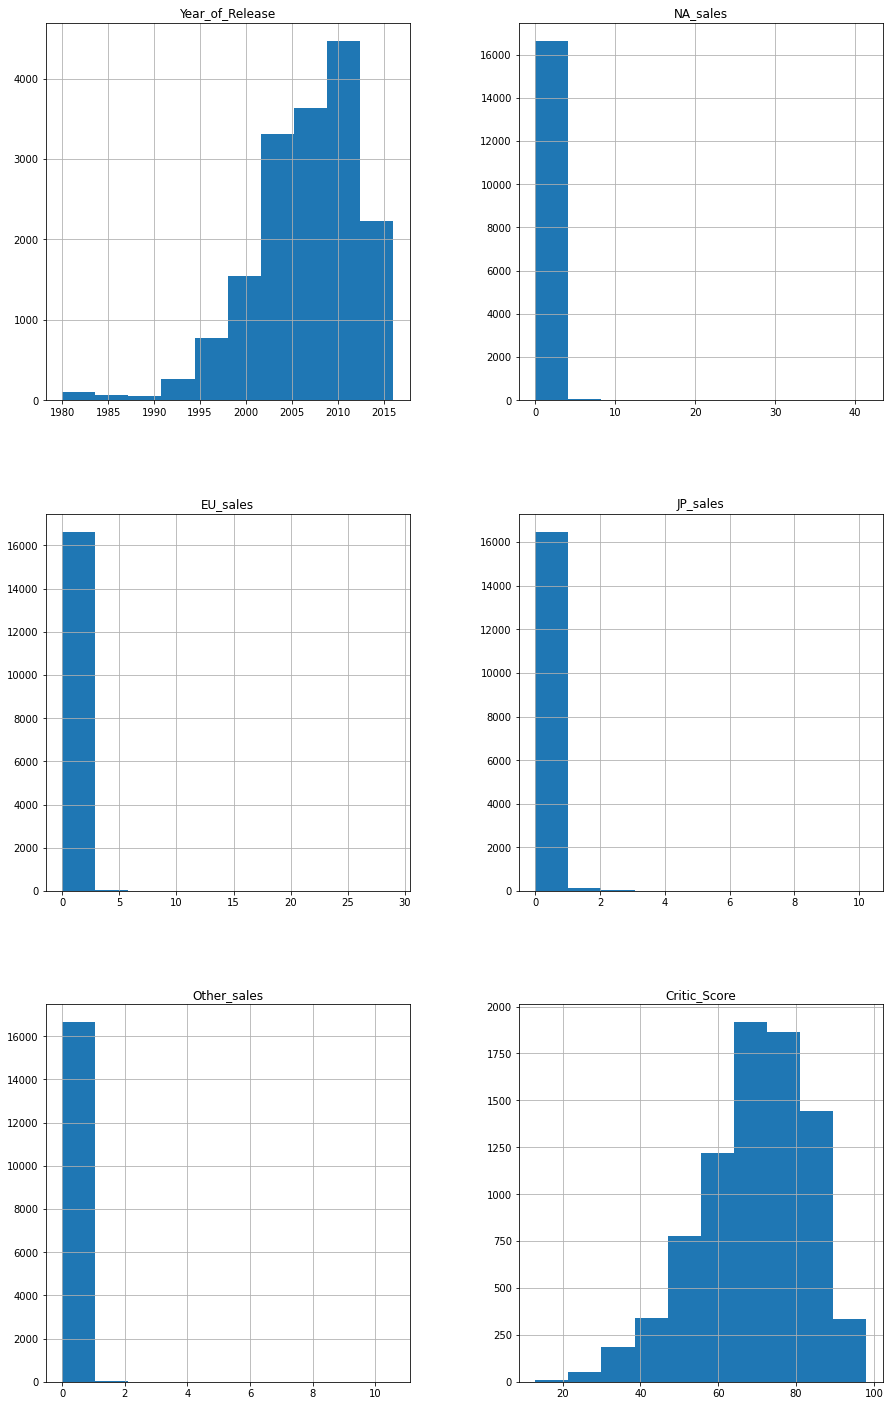

In [5]:
#Выведем гистограммы по всем количественным показателям
data.hist(figsize=(15,25))

**Предварительные выводы:**
- Большая часть игр стала выходить после 2000 года.
- Судя по графикам, есть аномально большие значения в столбцах c продажами: `Na_sales`, `EU_sales`, `JP_sales`, `Other_sales`.
- Отсутсвует столбец `User_Score` из - за некорректного формата.

### Предобработка данных

#### Работа с наименованиями столбцов

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Изменил способ переименования столбцов</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Короткий код - показатель профессионализма. Мы профи! Или как? 😄</font>

In [6]:
#Приведем наименования столбцов к змеиному регистру
data.columns = data.columns.str.lower()
#Проверим, что все привелось к необходимому виду
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом вот так:</font><br>
`df.columns = df.columns.str.lower()`

#### Работа с пропусками

In [7]:
#Для начала проверим, имеются ли дубликаты в данных
data.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, иногда они сильно искажают анализ.</font>

Дубликатов не обнаружилось.

In [8]:
#Также нельзя исключать того, что неявные дубликаты могут присутсвовать в столбце жанра, проверим
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Дубликатов в столбце "genre" не обнаружилось.

In [9]:
#Посмотрим на строки, в которых имеются пропуски как в наименовании, так и в жанре
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как и предполагалось, в строках с пропущенным наименованием также отсутствует жанр, для анализа эти строки мало будут чем полезны, соответсвенно, их можно удалить.

Можно предположить, что данные в источнике были изначально заполненны об этих играх некоректно, потому что рейтингов также нету.

In [10]:
#Оставляем в датафрейме игры с наименованием
data = data[data['name'].isna() == False]

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

In [11]:
#Проверим, что строки удалились
sum(data['name'].isna() == True)

0

In [12]:
#Посмотрим на строки с пропуском в годе релиза
data[data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
#Посччитаем процент пропусков от всех имеющихся строк
(data['year_of_release'].isna().sum() / data['year_of_release'].count()) * 100

1.6358550231087325

Пропусков не так много - `1.64%` ,отсутствие этих строк не исказит общий анализ, поэтому  мы можем их удалить.

In [14]:
#Удаляем строки
data = data.dropna(subset=['year_of_release'])

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Посчитал процент пропусков и удалил эти строки</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Почему удаляем год релиза и когда, что удалять. В реальности все зависит от поставленной задачи на исследование. В данном проекте необходимо определить актуальный период, на основании которого мы и будем делать прогнозы на 2017 год. Соответственно, мы все равно будем сокращать датасет, фильтруя по году релиза. А можно провести анализ, сколько пропусков года релиза приходится на платформы, которые например к 2000 году уже вышли с рынка, то есть для прогноза на 2017 год мы их явно учитывать не будем.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А зачем нам получать медианную "температуру" по "больнице" по пропускам года релиза когда их всего 1,6%. Удалить их и забыть.</font>

In [15]:
#Посмотрим на строки с пропусками в оценке критиков
data[data['critic_score'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски пересекаются явно в столбцах:
- `Critic_Score`
- `User_Score`
- `Rating`

На мой взгляд это связанно с источниками информации открытого типа(различные сайты, форумы и т.п.), скорее всего люди не оценивали эти игры на вышеуказанных источниках по возможной причине малой известности этих игр. В таком случае пропуски необходимо оставить без измений.

Заменить пропуски на медианные или средние значения не представляется возможным, потому что оценки - это очень субъективные показатели.

Разберем столбец "Rating". Говоря о системе ESRB, то этот возрастной рейтинг распространяется только на территории США, Канады и Мексики. Соответственно, при более детальном изучении столбца "Rating" стало понятно, что скорее всего игры не имеющие рейтинг - это игры, которые не были выпущенны на территории Северной Америки (или же оцененны только по таким рейтинговым системам как CERO, PEGI, USK). Тогда можно пометить их как "NOTESRB".

In [16]:
# Заполняем  пропуски в столбце
data['rating'] = data['rating'].fillna('NOTESRB')

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Добавил пояснения по столбцу "rating", заполнил пропуски в этом столбце заглушкой 'NOTESRB'</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

#### Работа с типом данных

In [17]:
#Приведем год релиза к целочисленному формату данных
data['year_of_release'] = data['year_of_release'].astype('int')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font>

In [18]:
#Нас заранее предупредили о значении "tbd" в столбце "user_score", посмотрим на все имеющиеся значения в данном столбце
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Да, действительно, значение "tbd" присутствует в столбце, при изучении информации, было выявленно то, что аббревиатура "tbd" обозначает "To Be Determined"(будет определенно), то есть на данный момент по какой - то причине оценки нету, значит это значение можно замение на "NaN".

In [19]:
#Меняем значение "tbd" на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

In [20]:
#Проверим, что все получилось.
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [21]:
#Теперь изменим тип данных столбца 'user_score' со строки на вещественное число
data['user_score'] = data['user_score'].astype('float')

In [22]:
#Проверим, что теперь везде нужный нам тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Добавление столбца общих продаж

In [23]:
#Добавим столбец, содержащий суммарные продажи игры по всем регионам
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Изменил</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

In [24]:
#Посмотрим на таблицу с новым столбцом
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NOTESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NOTESRB,31.38


In [25]:
#Изучим более детально информацию о данных
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


- оценки пользователей находятся в допустимых пределах, максимальная из 10 возможных - 9.7;
- оценки пользователей находятся в допустимых пределах, максимальная из 100 возможных - 98;
- максимальные значения продаж намного больше медианы, но, в нашем случае выбросы - залог успеха, ведь жанр и платформа игр с такими продажами может задать тренд и успех игр, которые выйдут в 2017.

In [26]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это мы сделаем позже? Ладно, будем смотреть дальше. </font>

### Исследовательский анализ данных

#### Количество выпущенных игр по годам

<AxesSubplot:title={'center':'Количество выпущенных игр с 1980 по 2016 год'}, xlabel='year_of_release'>

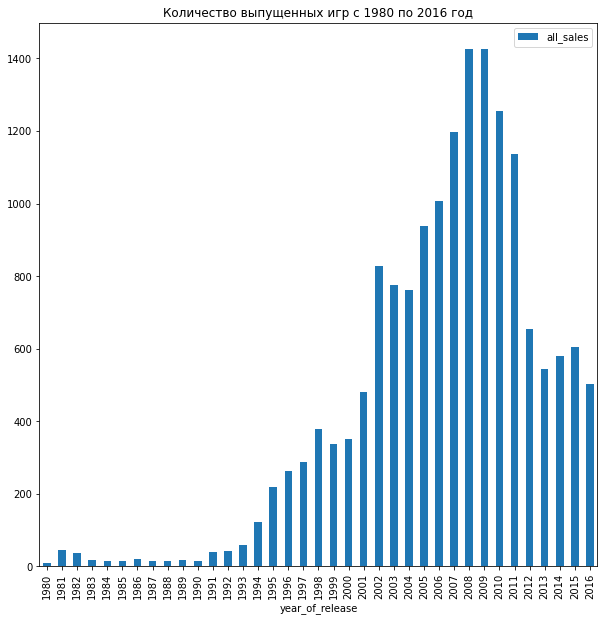

In [27]:
#Посмотрим, сколько игр выпускалось в разные годы
#Создаем сводную таблицу с индексами в виде года и значениями в виде продаж
year_pivot = data.pivot_table(index='year_of_release', values='all_sales', aggfunc='count')

#Выводим столбчатую диаграмму
year_pivot.plot(y='all_sales', kind='bar', figsize=(10,10), title='Количество выпущенных игр с 1980 по 2016 год')

Рост количества выпускаемых игр корелирует с переходом в новый 21 век.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот, что у нас написано в задании: <br><b>Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</b> <br>А мы не сделали.</font>

Я считаю что мы можем взять период с 2002 по 2016 год, ведь количество игр, вышедших в 2002 году, больше в ~1.72 по сравнению с 2001, можно сказать, что в 2002 году был игровой бум или же статистику вышедших игр стали вести более активно, тем не менее, именно в это время начинают определятся четкие рамки для жанров.

*Вывод: данные за все периоды - не важны, пока оставим период с 2002 по 2016 год.*

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Добавил столбчатую диаграмму. Выяснил, какой период важен</font>

In [28]:
#Поместим датасет с периодом 2002 по 2016 в переменную filtered_data
filtered_data = data[data['year_of_release'] >= 2002]

#### Продажи на популярных платформах

<AxesSubplot:xlabel='platform'>

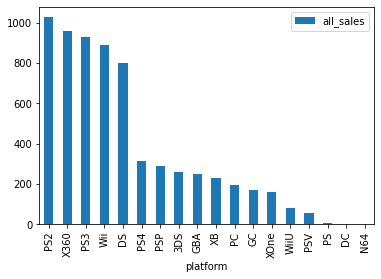

In [29]:
#Определим платформы с наибольшими суммарными продажами
filtered_data.pivot_table(index='platform', values='all_sales',
                          aggfunc='sum').sort_values(by='all_sales',
                                                     ascending=False).plot(y='all_sales', kind='bar')

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Убрал таблицу, добавил столбчатую диаграмму</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация. 👍</font><br>
<font color='DarkMagenta'>👉 А вот подписи по оси Y и названия графика не хватает. </font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При анализе принято визуализировать результаты в виде графиков или диаграмм. Таблицы малоинформативны и не наглядны.</font>

Выделим ТОП-5 платформ:
- PS2 - 1050.17
- X360 - 971.42
- PS3 - 939.65
- Wii - 907.51
- DS - 806.10

In [30]:
#Создадим сводную таблицу, в которой будут продажи платформ по годам
filtered_pivot = filtered_data.pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum')
filtered_pivot

all_sales
platform year_of_release           
3DS      2011                 63.20
         2012                 51.36
         2013                 56.57
         2014                 43.76
         2015                 27.78
...                             ...
XB       2008                  0.18
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

[131 rows x 1 columns]

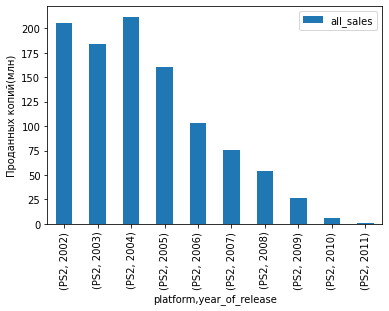

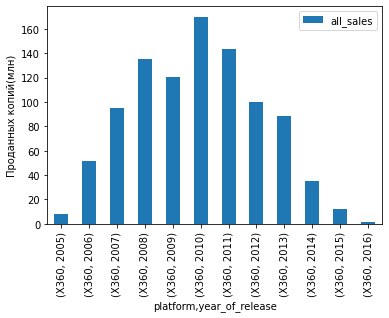

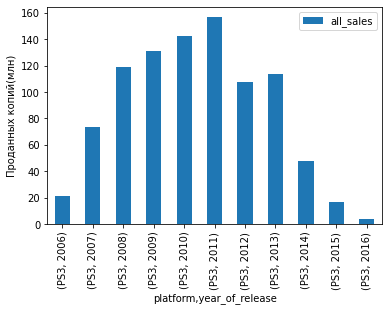

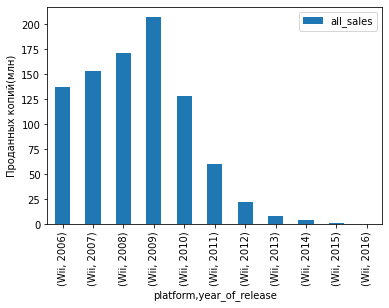

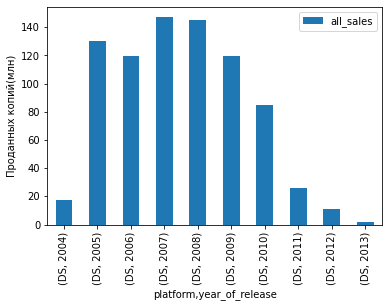

In [31]:
#Напишем цикл для вывода графиков продаж консолей по годам
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
for platform in top_platforms:
    
    filtered_pivot[filtered_pivot.index.get_level_values(0) == platform].plot(y='all_sales',kind='bar',
                                                                              ylabel="Проданных копий(млн)")

**Выводы из графиков:**
- Продажи PS2 резко упали с выходом PS3, или же с выходом так называемого нового поколения консолей(2006 год);
- Продажи PS3 резко упали с выходом PS4, PS4 выходила в продажу в разных странах в период с конца 2013 - начало 2014, на графике виден резкий спад в 2014 году;
- У XBOX 360 и PS3 графики очень схожи и не удивительно, ведь это главные конкуренты на рынке игровых консолей, также новое поколение под кодовым названием XBOX ONE выходила в продажу в разных странах в период с конца 2013 - начало 2014;
- Резкий спад продаж игр на платформе "Wii" по графику произошел в 2011 году;
- Резкий спад продаж игр на платформе "DS" по графику произошел в 2011 году.

#### Определение актуального периода

Исходя из получившихся выводов и определия года затухания для каждой консоли, мы можем посчитать среднее количество лет, которое составляет жизненный цикл консоли.
*Жизненные циклы ТОП-5 консолей:*
- PS2 - 5 лет
- X360 - 9 лет
- PS3 - 8 лет
- Wii - 5 лет
- DS - 7 лет

In [32]:
#Посчитаем средний жизненный цикл
(5 + 9 + 8 + 5 + 7) / 5

6.8

Период жизненного цикла консоли составит `7 лет`. `Na_sales`

На основании выводов, за актуальный период можно взять промежуток с 2014 года.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

In [33]:
actual_data = data[data['year_of_release'] >= 2014]

#### Отбор потенциально прибыльных платформ

In [34]:
#Построим сводную таблицу по актуальным данным
actual_pivot = actual_data.pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum')
actual_pivot

all_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

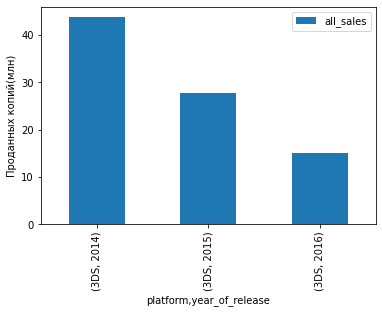

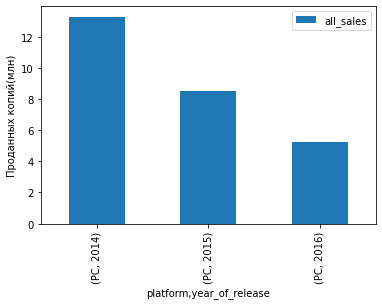

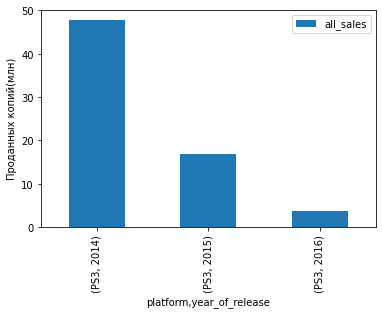

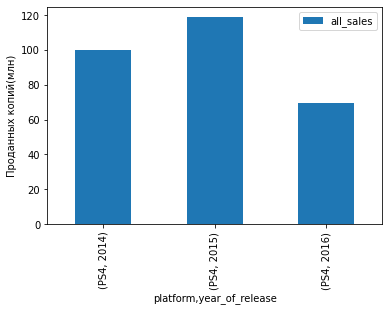

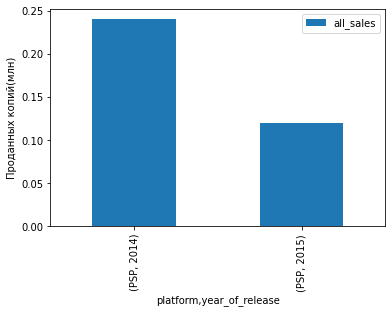

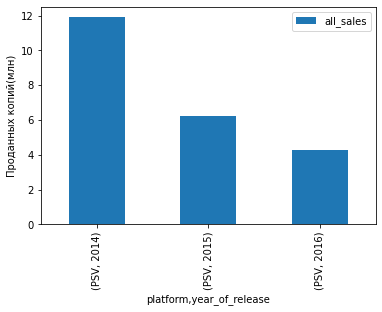

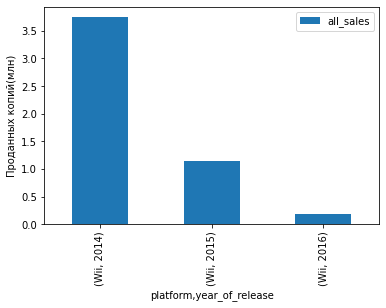

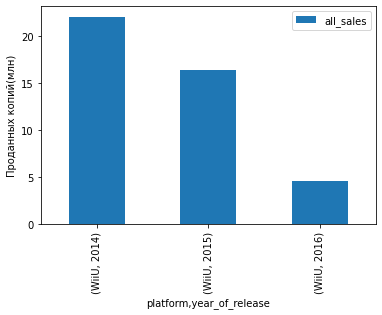

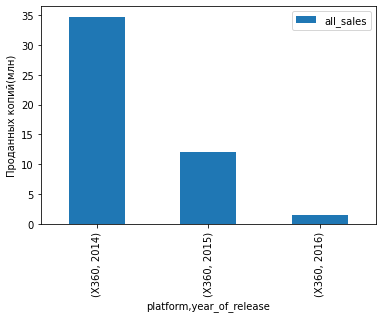

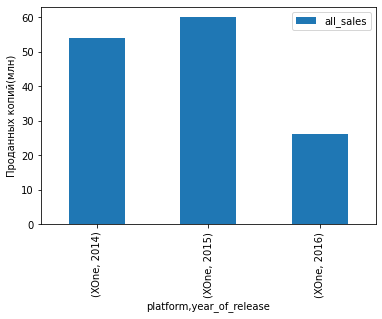

In [35]:
#Цикл для построения столбчатой диаграммы по проданным копиям за актуальный промежуток времени
for platform in actual_pivot.index.get_level_values(0).unique():
    
    actual_pivot[actual_pivot.index.get_level_values(0) == platform].plot(y='all_sales',kind='bar',
                                                                          ylabel="Проданных копий(млн)")

**Выводы из полученных графиков:**
- Для 3DS 2016 год будет является уже 6 годом ее существования, следовательно, платформа приближается к концу своего жизненного цикла, это также видно по подению продаж в 2015 году по сравнению с 2014. Данную платформу нельзя относить к потенциально прибыльным.
- PC (или же настольный персональный компьютер) является игровой платформой, которая не устаревает в принципе, сама концепция компьютера не несет в себе политику замены устройства, достаточно менять комплектующие. Но исходя из отфильтрованных данных, видно тенденцию понижения покупок. График по актуальным данным также это подтверждает. Значит, данную платформу нельзя относить к потенциально прибыльным.
- PS3 (относим к старому поколению). Продажи на данной консоли резко упали еще в 2014 году, в 2015 продажи просели более, чем в 2 раза. Данную платформу нельзя относить к потенциально прибыльным.
- На графике PS4 видно, что в 2015 году продалось больше игр, по сравненю с предыдущем, также платформа новая, значит, данную платформу можно отнести к потенциально прибыльным.+
- Удивительно, что в 2014 - 2015 годах выходили игры на платформу "PSP", ведь старт консоли приходится на 2004 год, хоть и продажи очень маленькие. Данная платформа не относится к потенциально прибыльным.
- PSV вышла в 2011 года и в 2015, по сравнению с 2014, продажи упали в 2 раза. Данную платформу нельзя относить к потенциально прибыльным.
- Wii вышла в 2006, жизненный цикл консоли уже прошел. Данную платформу нельзя относить к потенциально прибыльным.
- WiiU вышла в 2012, в 2015 году, по сравнению с 2014, продажи упали не так сильно. Консоль будет актуальна еще 3 года. Данную платформу можно отнести к потенциально прибыльным. +
- XBOX360 вышла в 2005, жизненный цикл консоли уже прошел. Данную платформу нельзя относить к потенциально прибыльным.
- На графике XOne видно, что в 2015 году продалось больше игр, по сравненю с предыдущем, также платформа новая, значит, данную платформу можно отнести к потенциально прибыльным.+

*В 2016 году объем проданных копий низкий, потому что данные за этот год не полные.*

*Было отобранно 3 потенциально прибыльных платформы:*
- PS4
- WiiU
- XOne

#### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А почему мы строим диаграммы размаха с фильтрацией по платформам? В задании топ-платформы не требуются, предполагаются все. Мы таким образом теряем значимую информацию. И диаграммы размаха надо строить на одной координтаной сетке (у нас же сравнительный анализ) в двух видах, в полном, со всеми выбросами и масштабированном с крупными боксплотами. Для вывода только нижней части boxplot-ов необходимо использовать параметр ylim. </font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Построил диаграмму размаха по глобальным продажам игр в разбивке по платформам, добавил подсчет выбросов, добавил описание продаж на каждой платформе,изменил промежуточные выводы</font>

Text(0.5, 1.0, 'Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

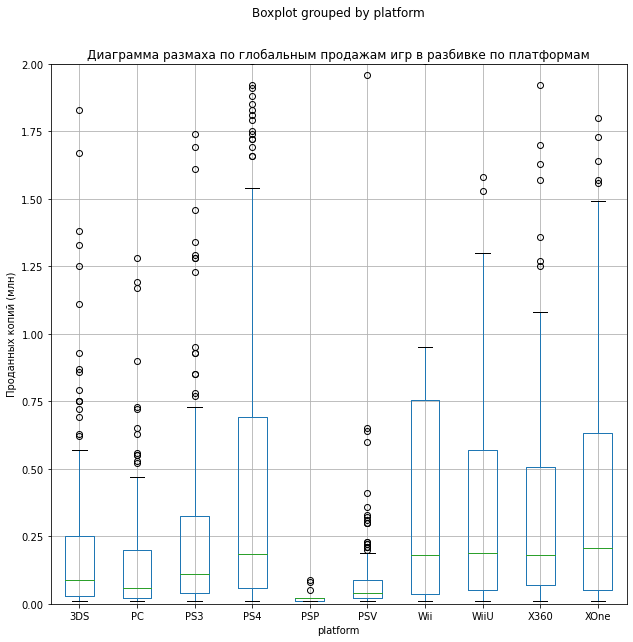

In [36]:
#Посмотрим на график с ограничем в 2млн копий
boxplot = actual_data.boxplot(column='all_sales',
                              by='platform', figsize=(10,10)).set_ylabel("Проданных копий (млн)")
plt.ylim(0, 2)
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')


In [37]:
#Создаем пустой датафрейм
for_describing = pd.DataFrame()
#Пишем цикл для заполнения датафреймами данными по каждой платформе
for platform in actual_data['platform'].unique():
    for_describing[platform] = actual_data.loc[actual_data['platform']==platform]['all_sales'].describe()
    #Посчитаем также точное количество выбросов
    iqr = for_describing[platform]['75%'] - for_describing[platform]['25%']
    high_g = for_describing[platform]['75%'] + 1.5 * iqr
    print('Количество выбросов для платформы',
          platform,':', actual_data.loc[(actual_data['platform']==platform) & 
                                        (actual_data['all_sales'] > high_g)]['all_sales'].count())
for_describing

Количество выбросов для платформы PS4 : 53
Количество выбросов для платформы 3DS : 27
Количество выбросов для платформы XOne : 25
Количество выбросов для платформы WiiU : 6
Количество выбросов для платформы PS3 : 20
Количество выбросов для платформы X360 : 10
Количество выбросов для платформы PC : 14
Количество выбросов для платформы Wii : 1
Количество выбросов для платформы PSV : 20
Количество выбросов для платформы PSP : 3


,PS4,3DS,XOne,WiiU,PS3,X360,PC,Wii,PSV,PSP
count,376.000000,212.000000,228.000000,73.000000,219.000000,111.000000,151.000000,11.000000,295.000000,13.000000
mean,0.766356,0.408868,0.615614,0.588767,0.311324,0.434414,0.179139,0.460909,0.075932,0.027692
std,1.614969,1.188368,1.046513,1.161467,0.633059,0.628967,0.329359,0.625451,0.141591,0.027735
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.057500,0.030000,0.050000,0.050000,0.040000,0.070000,0.020000,0.035000,0.020000,0.010000
50%,0.185000,0.090000,0.205000,0.190000,0.110000,0.180000,0.060000,0.180000,0.040000,0.020000
75%,0.690000,0.250000,0.632500,0.570000,0.325000,0.505000,0.200000,0.755000,0.090000,0.020000
max,14.630000,11.680000,7.390000,7.090000,5.270000,4.280000,3.050000,2.010000,1.960000,0.090000


**Выводы по диаграмме размаха:**
- Больше всего игр за актуальный период было выпущенно на платформах:
    - PS4(376)
    - PSV(295)
    - XOne(228)
    - 3DS(212)
    - PS3 (219)
- Больше всего игр, которые продались в аномально больших тиражах (рассматриваем внутри одной платформы) или же являются выбросами, продались на следующих платформах:
    - PS4(53)
    - 3DS(27)
    - XOne(25)
    - PSV(20)
    - PS3(20)
    
- Лучше всего в среднем на следующих платформах игры продаются лучше всего (рассматриваем медианное значение, среднюю искажают выбросы):
    - XOne (205 000 копий одной игры)
    - WiiU (190 000 копий одной игры)
    - PS4 (185 000 копий одной игры)
    - Wii (180 000 копий одной игры)
    - X360 (180 000 копий одной игры)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты:</font>
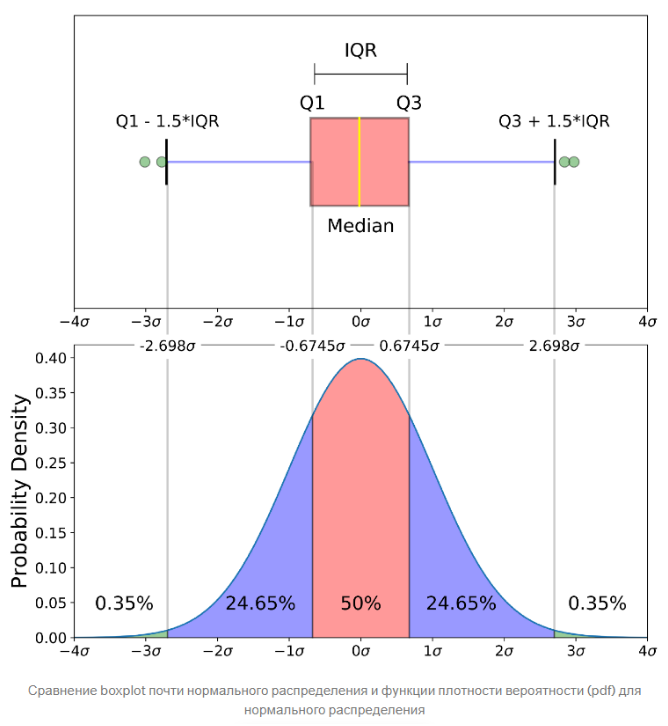

#### Влияние отзывов пользователей и критиков на продажи

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

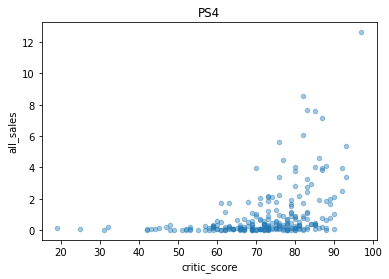

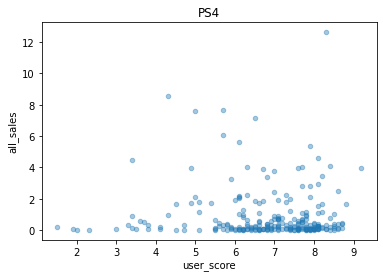

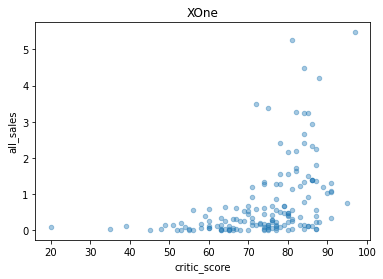

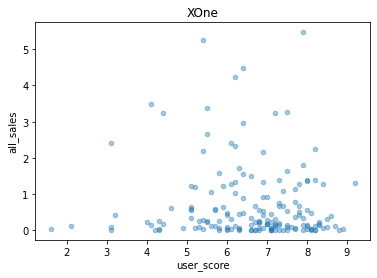

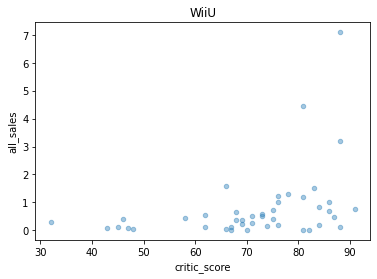

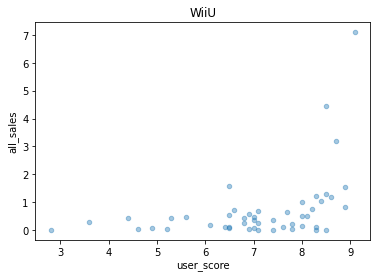

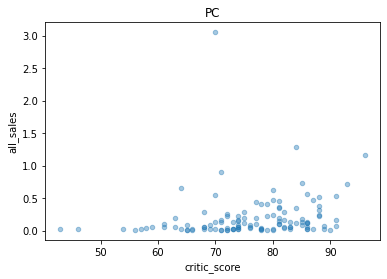

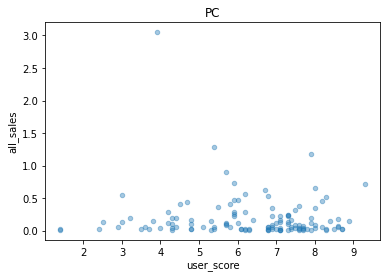

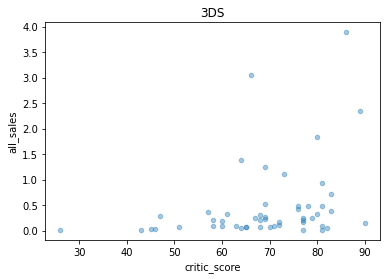

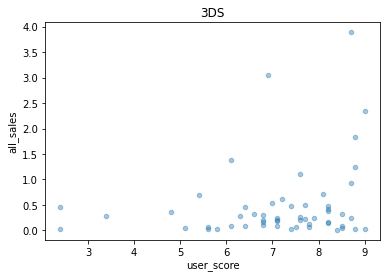

In [38]:
#Посмотрим как вляют отзывы пользователей и критиков на потенциально прибыльных платформах,
#также возьмем платформы с не самыми высокими продажами одной игры в среднем
platforms = ['PS4', 'XOne', 'WiiU', 'PC', '3DS']
for platform in platforms:
    actual_data[actual_data['platform']==platform].plot(x='critic_score',
                                                            y='all_sales', kind='scatter', alpha=0.4, title=platform)
    actual_data[actual_data['platform']==platform].plot(x='user_score',
                                                            y='all_sales', kind='scatter', alpha=0.4, title=platform) 

In [39]:
for platform in platforms:  
    print('Корреляция между продажами на платформе', platform, 'и оценкой критиков составляет:',
         actual_data[actual_data['platform']==platform]['all_sales'].corr(filtered_data['critic_score']))
    print('Корреляция между продажами на платформе', platform, 'и оценкой пользователей составляет:',
         actual_data[actual_data['platform']==platform]['all_sales'].corr(filtered_data['user_score']))    
    print('----------------------------------')

Корреляция между продажами на платформе PS4 и оценкой критиков составляет: 0.40266141068104083
Корреляция между продажами на платформе PS4 и оценкой пользователей составляет: -0.040131589472697356
----------------------------------
Корреляция между продажами на платформе XOne и оценкой критиков составляет: 0.42867694370333226
Корреляция между продажами на платформе XOne и оценкой пользователей составляет: -0.0703839280647581
----------------------------------
Корреляция между продажами на платформе WiiU и оценкой критиков составляет: 0.370201412480884
Корреляция между продажами на платформе WiiU и оценкой пользователей составляет: 0.4079264579217078
----------------------------------
Корреляция между продажами на платформе PC и оценкой критиков составляет: 0.17463413769350036
Корреляция между продажами на платформе PC и оценкой пользователей составляет: -0.07159665703472452
----------------------------------
Корреляция между продажами на платформе 3DS и оценкой критиков составляет: 0.3

**Выводы по полученным данным:**
- На 4 из 5 платформах прослеживается схожая положительная корреляция - средняя составляет ~0.38. Это означает то, что чем выше отзыв критиков, тем выше число продаж игры, но так происходит не всегда, есть и другие факторы, которые влияют на продажи. Однако на платформе "PC" наблюдается очень малая положительная корреляция можно предположить, что так происходит из - за особенности данной платформы в том, что у нее по сути нету жизненного цикла, она присутсвует и актуальна на рынке всегда.
- Между продажами и отзывами игроков прослеживается положительная корреляция на платформе WiiU - 0.4 и 3DS - 0.21. Также есть и другие факторы, которые влияют на продажи.
- Между оценками игроков и продажами нет корреляции как на платформе PS4, XOne и PC на этих платформах отзывы игроков не влияют на общие продажи игр.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
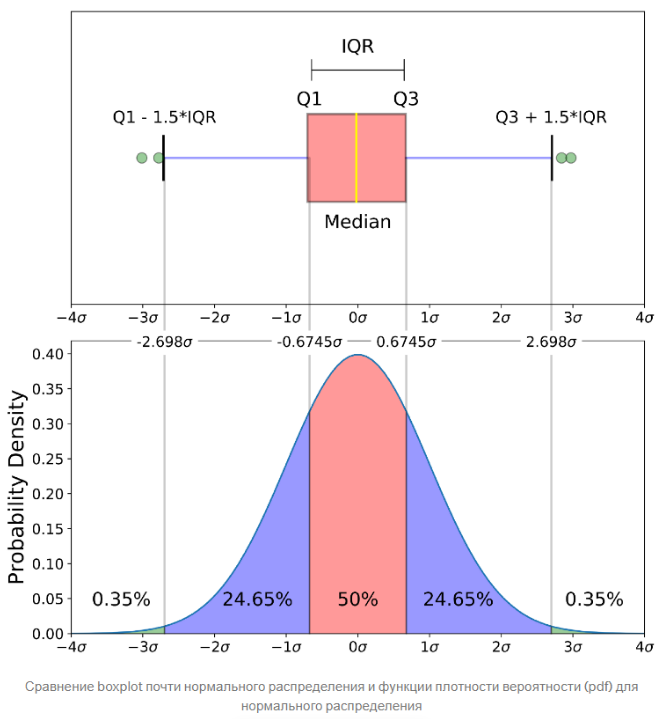

In [40]:
for platform in platforms:

    print('В среднем критики оценивают игры от',
          actual_data[actual_data['platform'] == platform]['critic_score'].describe()['25%'],'баллов до',
         actual_data[actual_data['platform'] == platform]['critic_score'].describe()['75%'], 'на платформе', platform)
    print('В среднем игроки оценивают игры от',
          actual_data[actual_data['platform'] == platform]['user_score'].describe()['25%'],'баллов до',
         actual_data[actual_data['platform'] == platform]['user_score'].describe()['75%'], 'на платформе', platform)
    print('----------------------------------')

В среднем критики оценивают игры от 66.0 баллов до 80.0 на платформе PS4
В среднем игроки оценивают игры от 6.2 баллов до 7.875 на платформе PS4
----------------------------------
В среднем критики оценивают игры от 66.5 баллов до 83.0 на платформе XOne
В среднем игроки оценивают игры от 5.8 баллов до 7.6 на платформе XOne
----------------------------------
В среднем критики оценивают игры от 66.5 баллов до 81.5 на платформе WiiU
В среднем игроки оценивают игры от 6.5 баллов до 8.225 на платформе WiiU
----------------------------------
В среднем критики оценивают игры от 71.0 баллов до 83.25 на платформе PC
В среднем игроки оценивают игры от 5.325 баллов до 7.6 на платформе PC
----------------------------------
В среднем критики оценивают игры от 63.5 баллов до 78.5 на платформе 3DS
В среднем игроки оценивают игры от 6.5 баллов до 8.2 на платформе 3DS
----------------------------------


- Среди оценок игроков практически нет игр, оцененных выше 9 баллов.
- Среди оценок критиков практически нет игр, оцененных выше 90 баллов.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только три. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

#### Общее распределение игр по жанрам

In [41]:
genre_pivot = actual_data.pivot_table(index='genre',
                                      values='all_sales',
                                      aggfunc=['median', 'count']).sort_values(by=('median', 'all_sales'), ascending=False)
genre_pivot

,median,count
,all_sales,all_sales
genre,,
Shooter,0.515,128
Sports,0.180,161
Platform,0.140,38
Fighting,0.125,60
Role-Playing,0.110,221
Simulation,0.100,44
Action,0.090,619
Misc,0.090,113


(0.0, 4.0)

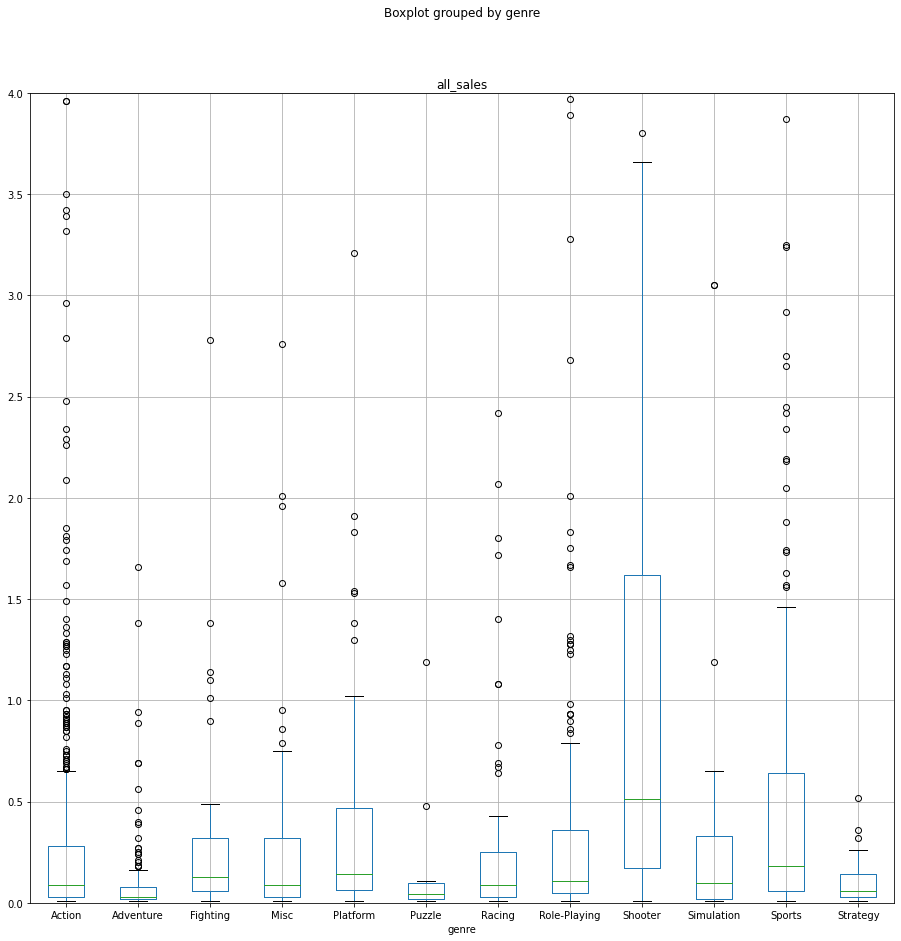

In [42]:
actual_data.boxplot('all_sales', by='genre', figsize=(15, 15))
plt.ylim(0, 4)

Жанр с самыми высокими продажами - Shooter	(Шутер) - жанр компьютерных игр, в которых игровой процесс основывается на сражениях с использованием огнестрельного или любого другого оружия с видом от первого лица.

Жанр с самыми низкими продажами - Adventure	(приключенческая игра). Игры из этого жанра представляют из себя интерактивную историю с главным героем, управляемым игроком.

Самые прибыльные жанры (в порядку убывания популярности):
- Shooter (медианное значение - 515 000 проданный копий)
- Sports (Спортивные игры) - жанр, в котором игра является имитацией существующих в действительности видов спорта(медианное значение - 180 000 проданный копий).
- Platform (Платформер) - жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня(медианное значение - 140 000 проданный копий).
- Fighting (Файтинг) - жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства, называемого ареной(медианное значение - 125 000 проданный копий).
- Role-Playing (Ролевая игра) - жанр компьютерных игр, основанный на элементах игрового процесса традиционных настольных ролевых игр(медианное значение - 110 000 проданный копий).

Отличительной особенностью в этих жанрах является то, что в них подразумевается взаимодействие с другими реальными игроками, как онлайн, так и на одном устройстве.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В задании требуется определить прибыльные жанры.<br>Но максимальное количество игр и продажи не являются самыми прибыльными. У нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому нам лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы. Сделаем?</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Добавил в таблицу медианное значение продаж по жанру, добавил диаграмму размаха с ограничением до 4 млн копий, доработал промежуточные выводы</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.</font>

### Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

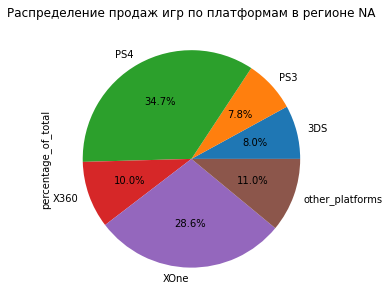

In [43]:
#Создаем сводную таблицу для региона северной Америки
na_platforms = actual_data.pivot_table(index='platform', values='na_sales',
                                       aggfunc='sum').sort_values(by='na_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
na_platforms["percentage_of_total"] = round(na_platforms['na_sales'] / sum(na_platforms['na_sales']) * 100, 2)

for platform in na_platforms.index:
    if na_platforms.loc[platform][1] < 7.76:
        na_platforms.rename(index={platform:'other_platforms'}, inplace=True)
     
na_platforms = na_platforms.groupby(level=0).sum()
plot = na_platforms.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по платформам в регионе NA", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0, figsize=(5,5))

В регионе "Северная Америка" топ-5 платформ:
- PS4
- XOne
- X360
- 3DS
- PS3

Больше половины от всех проданных копий приходится на платформы нового поколения(PS4, XOne) - `63,3%`. `25,69%` предпочитают консоли старого поколения (XBOX 360, 3DS, PS3)

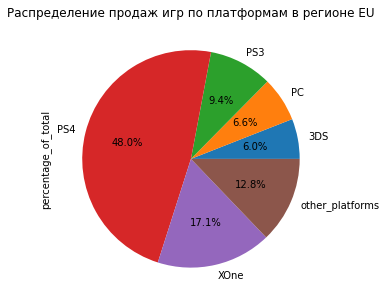

In [44]:
#Создаем сводную таблицу для Европейского региона
eu_platforms = actual_data.pivot_table(index='platform', values='eu_sales',
                                       aggfunc='sum').sort_values(by='eu_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
eu_platforms["percentage_of_total"] = round(eu_platforms['eu_sales'] / sum(eu_platforms['eu_sales']) * 100, 2)

for platform in eu_platforms.index:
    if eu_platforms.loc[platform][1] < 5.96:
        eu_platforms.rename(index={platform:'other_platforms'}, inplace=True)
     
eu_platforms = eu_platforms.groupby(level=0).sum()
plot = eu_platforms.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по платформам в регионе EU", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0, figsize=(5,5))

В регионе "Европа" топ-5 платформ:
- PS4
- XOne
- PS3
- PC
- 3DS

Больше половины от всех проданных копий приходится на платформы нового поколения(PS4, XOne) - `65,11%`. `15,38%` предпочитают консоли старого поколения (3DS, PS3). Также `6,64%` проданных игр приходится на персональные компьютеры(PC).

Можно сказать, что предпочтения в выборе платформы пользователя из Европы будут довольно схожими с пользователем из Северной Америки, за исключением того, что в Европе предпочитают PC, а в Северной Америке - XBOX 360.

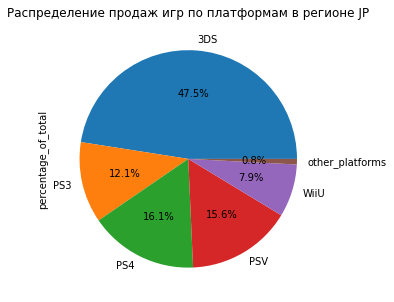

In [45]:
#Создаем сводную таблицу для Японского региона
jp_platforms = actual_data.pivot_table(index='platform', values='jp_sales',
                                       aggfunc='sum').sort_values(by='jp_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
jp_platforms["percentage_of_total"] = round(jp_platforms['jp_sales'] / sum(jp_platforms['jp_sales']) * 100, 2)

for platform in jp_platforms.index:
    if jp_platforms.loc[platform][1] < 7.85:
        jp_platforms.rename(index={platform:'other_platforms'}, inplace=True)
     
jp_platforms = jp_platforms.groupby(level=0).sum()
plot = jp_platforms.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по платформам в регионе JP", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0, figsize=(5,5))

В регионе "Япония" топ-5 платформ:
- 3DS
- PS4
- PSV
- PS3
- WiiU

Отметим, что в данном регионе топ занимают консоли "отечественного производства", ведь все эти консоли были разработанны в Японии.

Больше половины от всех проданных копий приходится на платформы старого поколения(3DS, PSV, PS3, WiiU) - `83,06%`. `16,12%` предпочитают консоли нового поколения (PS4).

Можно сказать, что предпочтения в выборе платформы пользователя из Японии, достаточно самобытны и отличаются от вышеописанных регионов.

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Добавил круговые диаграммы</font>

#### Самые популярные жанры (топ-5)

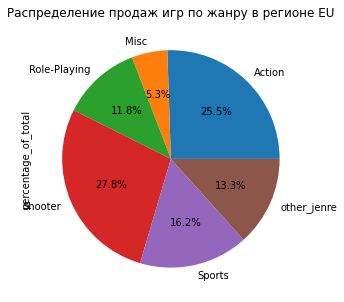

In [46]:
#Создаем сводную таблицу для региона северной Америки по жанру
na_genres = actual_data.pivot_table(index='genre', values='na_sales',
                                       aggfunc='sum').sort_values(by='na_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
na_genres["percentage_of_total"] = round(na_genres['na_sales'] / sum(na_genres['na_sales']) * 100, 2)

for jenre in na_genres.index:
    if na_genres.loc[jenre][1] < 5.30:
        na_genres.rename(index={jenre:'other_jenre'}, inplace=True)
     
na_genres = na_genres.groupby(level=0).sum()
plot = na_genres.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по жанру в регионе EU", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0, figsize=(5,5))

В регионе "Северная Америка" топ-5 жанров:
- Shooter
- Action
- Sports
- Role-Playing
- Misc

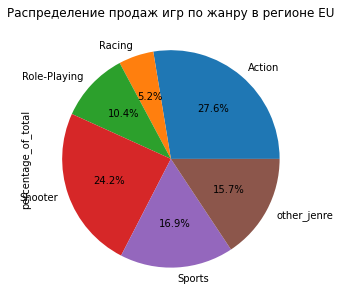

In [47]:
#Создаем сводную таблицу для региона Европы по жанрам
eu_genres = actual_data.pivot_table(index='genre', values='eu_sales',
                                       aggfunc='sum').sort_values(by='eu_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
eu_genres["percentage_of_total"] = round(eu_genres['eu_sales'] / sum(eu_genres['eu_sales']) * 100, 2)

for jenre in eu_genres.index:
    if eu_genres.loc[jenre][1] < 5.22:
        eu_genres.rename(index={jenre:'other_jenre'}, inplace=True)
     
eu_genres = eu_genres.groupby(level=0).sum()
plot = eu_genres.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по жанру в регионе EU", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0, figsize=(5,5))

В регионе "Европа" топ-5 жанров:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

Топ - 4 жанра одинаковы, как для региона Северной Америки, так и для Европы (в скобках указаны значения для Северной Америки):
- Action 27.58 (25.52)
- Shooter 24.20 (27.81)
- Sports 16.89 (16.23)
- Role-Playing 10.42 (11.82)


В Европе вместо жанра Misc игроки предпочитают жанр Racing.

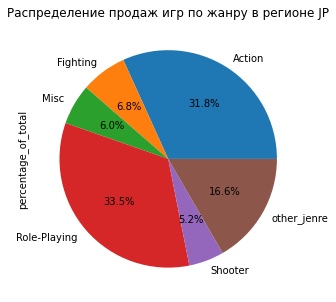

In [48]:
#Создаем сводную таблицу для региона Японии по жанрам
jp_genres = actual_data.pivot_table(index='genre', values='jp_sales',
                                       aggfunc='sum').sort_values(by='jp_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
jp_genres["percentage_of_total"] = round(jp_genres['jp_sales'] / sum(jp_genres['jp_sales']) * 100, 2)


for jenre in jp_genres.index:
    if jp_genres.loc[jenre][1] < 5.23:
        jp_genres.rename(index={jenre:'other_jenre'}, inplace=True)
       
jp_genres = jp_genres.groupby(level=0).sum()
plot = jp_genres.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по жанру в регионе JP", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=False, startangle=0, figsize=(5,5))

В регионе "Япония" топ-5 жанров:
- Role-Playing
- Action	
- Fighting	
- Misc	
- Shooter

Жанровые предпочтения игроков данного рынка ближе к предпочтениям игроков из региона Европы.

В отличие от двух регионов на первом месте по популярности стоит жанр Role-Playing. Можно предположить, что это из - за разницы в менталитете в этих регионах. Также первые игры жанра Role-Playing появились в Японии.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные не всегда информативны. У нас этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
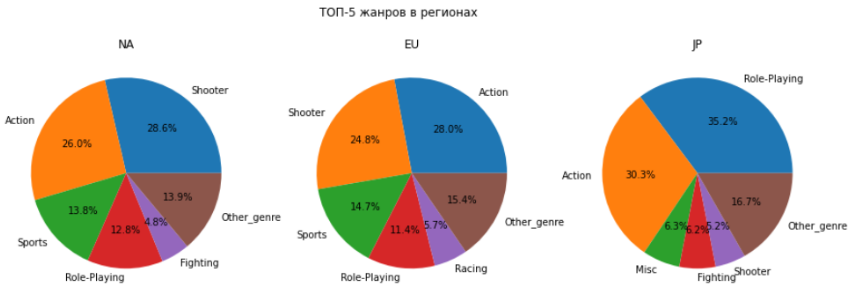

#### Влияние рейтинга ESRB на продажи

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Установил заглушку выше в пункте 2.2, добавил круговые диаграммы</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец, правильное решение. 👍</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В датасете нет значений возрастного рейнига равного 3.</font>

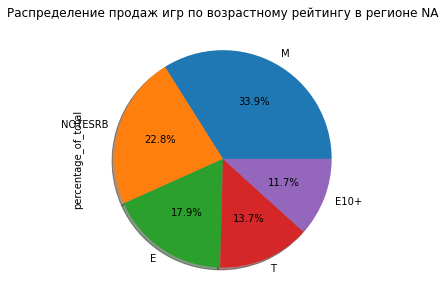

In [49]:
#Создаем сводную таблицу для региона северной Америки
na_rating = actual_data.pivot_table(index='rating', values='na_sales',
                                       aggfunc='sum').sort_values(by='na_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
na_rating["percentage_of_total"] = round(na_rating['na_sales'] / sum(na_rating['na_sales']) * 100, 2)
na_rating

plot = na_rating.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по возрастному рейтингу в регионе NA", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0, figsize=(5,5))

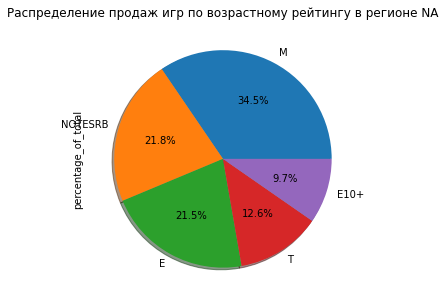

In [50]:
#Создаем сводную таблицу для региона северной Америки
eu_rating = actual_data.pivot_table(index='rating', values='eu_sales',
                                       aggfunc='sum').sort_values(by='eu_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
eu_rating["percentage_of_total"] = round(eu_rating['eu_sales'] / sum(eu_rating['eu_sales']) * 100, 2)
plot = eu_rating.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по возрастному рейтингу в регионе NA", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0, figsize=(5,5))

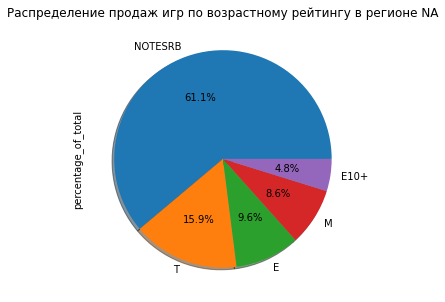

In [51]:
#Создаем сводную таблицу для региона северной Америки
jp_rating = actual_data.pivot_table(index='rating', values='jp_sales',
                                       aggfunc='sum').sort_values(by='jp_sales', ascending=False)
#Добавляем столбец, содержащий долю от всего объема проданных копий
jp_rating["percentage_of_total"] = round(jp_rating['jp_sales'] / sum(jp_rating['jp_sales']) * 100, 2)
plot = jp_rating.plot.pie(y='percentage_of_total',
                          title="Распределение продаж игр по возрастному рейтингу в регионе NA", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0, figsize=(5,5))

**Вывод:**
- Рейтинги ESRB для регионов Северной Америки и Европы идентичны (Лучше всего продаются игры, которые имеют рейтинг «M» («Mature»)). Игры, которые продаются хуже всего имеют рейтинг ESRB - «E10+» («Everyone 10 and older»). Также для регионов Североной Америки и Европы приходится по 22.8% и 21.8%, соответсвенно, игр не имеющих рейтинг ESRB.
- В Японии самая большая доля (61.1%) приходится на игры без рейтинга ESRB, вероятнее всего они имеют рейтинг CERO, который принят в Японии.
- В Японии, напротив, игры с рейтингом «M» («Mature») находятся на предпоследнем месте по популярности. Игры с рейтингом «E10+» («Everyone 10 and older») также являются самыми непопулярными с долей от общих продаж - 4.79%.

*Как итог - рейтинг ESRB влияет на продажи в отдельных регионах.*

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Изменил выводы на основе ввода заглушки</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы при предобработке данных не поставили заглушку на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема у нас в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

In [52]:
# Комментарий ревьюера
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


NOTESRB    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

### Проверка гипотез

#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Пользовательский рейтинг(user_score) платформы "Xbox One" = пользовательскому рейтингу (user_score) платформы "PC"
H_a: Пользовательский рейтинг(user_score) платформы "Xbox One" ≠ пользовательскому рейтинг (user_score) платформы "PC"
```

Нулевая гипотеза была сформулированна исходя из условия гипотезы, которую требовалось проверить, то есть предполагалось, что средние пользовательские рейтинги платформ Xbox One и PC равны, соответственно, альтернативная гипотеза опровергает нулевую, обратным условием их неравенства.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [53]:
# Создадим генеральную совокупность пользовательских оценок игр на платформе XOne
score_xone = actual_data.loc[actual_data['platform']=='XOne']['user_score'].dropna()

# Создадим генеральную совокупность пользовательских оценок игр на платформе PC
score_pc = actual_data.loc[actual_data['platform']=='PC']['user_score'].dropna()

#Вызываем метод для проверки гипотезы
results = st.ttest_ind(score_xone, score_pc)

#Критический уровень статистической значимости задали значением в 5%
alpha = 0.05

#Выводим значения p-value на экран 
print(results.pvalue)

#Условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали пропуски. 👍</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.</font>

*Отвергнуть нулевую гипотезу не удалось, значит, действительно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

In [54]:
#Приведем в подтверждение сводную таблицу, чтобы проверить равенство средних пользовательских оценок
actual_data.pivot_table(index='platform', values='user_score', aggfunc='mean').sort_values(by='user_score', ascending=False)

,user_score
platform,
PSV,7.656164
3DS,7.138182
WiiU,7.087500
PS4,6.828099
XOne,6.594545
Wii,6.350000
PC,6.298361
PS3,6.014286
X360,5.771084


6.59 у XOne и 6.30 у PC, действительно довольно схоже.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


```
H_0: Пользовательский рейтинг(user_score) жанра "Action" = пользовательскому рейтингу(user_score) жанра Sports
H_a: Пользовательский рейтинг(user_score) жанра "Action" ≠ пользовательскому рейтингу(user_score) жанра Sports
```

Нулевая гипотеза была сформулированна вопреки первоначальному условию о том, что средние пользовательские рейтинги жанров Action и Sports разные, в ней мы предполагаем , что их рейтинги одинаковые. Если нулевая гипотеза будет опровергнута, то гипотеза из условия или же - альтернативная, будет верна.

In [55]:
#Создадим генеральную совокупность пользовательских оценок игр жанра Action
score_action = actual_data.loc[actual_data['genre']=='Action']['user_score'].dropna()

#Создадим генеральную совокупность пользовательских оценок игр жанра Sports
score_sports = actual_data.loc[actual_data['genre']=='Sports']['user_score'].dropna()

#Вызываем метод для проверки гипотезы
results = st.ttest_ind(score_action, score_sports)

#Критический уровень статистической значимости задали значением в 5%
alpha = 0.05

#Выводим значения p-value на экран 
print(results.pvalue)

#Условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

2.8711147985105864e-19
Отвергаем нулевую гипотезу


*Нулевая гипотеза была отвергнута, следовательно, средние пользовательские рейтинги жанров Action и Sports разные.*

In [56]:
#Приведем в подтверждение сводную таблицу, чтобы проверить неравенство средних пользовательских оценок
actual_data.pivot_table(index='genre', values='user_score', aggfunc='mean').sort_values(by='user_score', ascending=False)

,user_score
genre,
Puzzle,7.975000
Adventure,7.470213
Role-Playing,7.348571
Strategy,7.216667
Fighting,6.983784
Misc,6.968293
Action,6.760606
Platform,6.741379
Shooter,6.549074


6.76 у жанра Action и 5.23 у жанра Sports, у спортивных игр оценки в среднем ниже на 13%.

Для проверки гипотез был применен t-критерий Стьюдента.
Мы применили данный критерий, потому что:
- исходные данные имели нормальное распределение
- предположили, что дисперсии сравниваемых групп равны

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>
Описал процесс формирования гипотез
    
Пояснил, какой критерий применил и почему</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font><br>
<font color='Red'>🛠 Необходимо сделать выводы по данному разделу согласно заданию:<br>
<b>Поясните:<br>
Как вы сформулировали нулевую и альтернативную гипотезы;<br>
Какой критерий применили для проверки гипотез и почему.</b>
</font>

### Общий вывод

<h2>Общий вывод <a class="tocSkip"> </h2>

Исследование было завершено. В ходе него были проделанны следующие этапы:
    
- *Изучена общая информация о данных*
 
    
- *Обработали данные*
    - удалили пропуски
    - изменили типы данных
    - проверили датасет на наличие дубликатов
    - категоризация данных
    - посчитали суммарные продажи во всех регионах
    
- *Исследовательский анализ данных*
    - выявили актуальный период: промежуток с начала 2014 года - по конец 2016 года
    - средний период жизненного цикла консоли составляет 7 лет
    - было отобранно 3 потенциально прибыльных платформы:
        - *PS4*
        - *WiiU*
        - *XOne*
    - построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам
    - построили диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами
    - изучили общее распределение игр по жанрам
    - выделили жанры с высокими и низкими продажами

         
- *Составили портрет пользователя каждого региона*
    
    
- *Проверили следующие гипотезы:*
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

**Предложения по распределению рекламного бюджета**

</font><font color='Green'><b>*Северная Америка*</b></font><br>

В данном регионе следует сделать акцент на игры двух платформ - это "PS4" и "Xbox One". Данные платформы за актуальный период имеют доли проданных копий игр в 63,3% и 25,69%, соответсвенно.

В данном регионе популярны следующие жанры игр:
- Shooter
- Action
- Sports
- Role-Playing
- Misc

Лучше всего из этих жанров выделить игры жанра: 
- Shooter(одна игра в среднем расходится в тираже 515 000 проданных копий)
- Sports (одна игра в среднем расходится в тираже 180 000 проданных копий)
- Role-Playing (одна игра в среднем расходится в тираже 110 000  проданных копий)

В регионе Северной Америки лучше продавать игры с имеющимся рейтингом ESRB, потому что потребителю он будет знаком больше, чем остальные рейтинги, стоит обратить особое внимание на игры рейтинга M и E. Игры с данным рейтингом за актуальный период имеют доли проданных копий в 33.9% и 17.9%, соответсвенно.

При выборе игр на продажу стоит учитывать оценки критиков на обеих платформах.

-------------------------------------------

</font><font color='Green'><b>*Европа*</b></font><br>

В данном регионе следует сделать акцент на игры двух платформ - это "PS4" и "Xbox One". Данные платформы за актуальный период имеют доли проданных копий игр в 48% и 17.1%, соответсвенно.

В данном регионе популярны следующие жанры игр:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

Лучше всего из этих жанров выделить игры жанра: 
- Shooter(одна игра в среднем расходится в тираже 515 000 проданных копий)
- Sports (одна игра в среднем расходится в тираже 180 000 проданных копий)
- Role-Playing (одна игра в среднем расходится в тираже 110 000  проданных копий)

В регионе Европы лучше продавать игры с имеющимся рейтингом ESRB, потому что потребителю он будет знаком больше, чем остальные рейтинги, стоит обратить особое внимание на игры рейтинга M и E. Игры с данным рейтингом за актуальный период имеют доли проданных копий в 34.5% и 21.5%, соответсвенно.

При выборе игр на продажу стоит учитывать оценки критиков на обеих платформах.


-------------------------------------------



</font><font color='Green'><b>*Япония*</b></font><br>

В данном регионе следует сделать акцент на игры двух платформ - это "PS4" и "WiiU". Данные платформы за актуальный период имеют доли проданных копий игр в 16,1% и 7,9%, соответсвенно.

В данном регионе популярны следующие жанры игр:
- Role-Playing
- Action
- Fighting
- Misc
- Shooter

Лучше всего из этих жанров выделить игры жанра: 
- Shooter(одна игра в среднем расходится в тираже 515 000 проданных копий)
- Fighting(одна игра в среднем расходится в тираже 125 000  проданных копий)
- Role-Playing (одна игра в среднем расходится в тираже 110 000  проданных копий)

В регионе Японии рейтинг ESRB не будет иметь большого веса, так как 61.1% купленных видеоигр за актуальный период не имели его вовсе. Если же мы будем проводить аналогии с другими возрастными рейтингами то по ESRB они должны соответствовать Рейтингу "T" (Проданные игры с таким рейтином в Японии занимают долю в 15.9% от общего числа игр)

При выборе игр на продажу стоит учитывать оценки критиков на обеих платформах. Также, если будет решено продавать игры на "WiiU", то стоит также учитывать отзывы игроков.

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>
Выводы доработал</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>У нас вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Игорь, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Переделать обработку пропусков по годам релиза. Сделать анализ выпуска игр по годам. Построить диаграммы размаха по глобальным продажам игр в разбивке по всем платформам. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж и построить диаграммы размаха. Переделать анализ влияния рейтинга ESRB на продажи в регионах. Необходимо сделать выводы по разделу гипотез согласно заданию.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Игорь! Нам удалось справиться со всеми подводными камнями в проекте.  Мы молодцы! 😄<br>
Мы узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого нам понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Мы узнали, что медианы могут дать дополнительную информацию при анализе. Это наши новые знания и навыки, которые нам пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
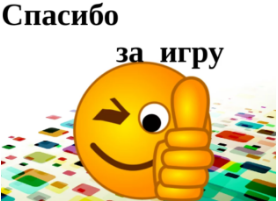